In [13]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\heatmap\heatmap_env\Scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Thiết lập style cho biểu đồ
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
# Đường dẫn file Excel
excel_file = '4_stations_31_7.xlsx'

# Kiểm tra file có tồn tại không
import os
if os.path.exists(excel_file):
    print(f"✅ File {excel_file} tồn tại!")
else:
    print(f"❌ File {excel_file} không tồn tại!")
    print("Hãy đảm bảo file Excel nằm trong cùng thư mục với notebook này.")
print("✅ Đã import thành công tất cả thư viện!")

✅ Đã import thành công tất cả thư viện!


In [10]:
# Định nghĩa các biến thủy văn cho từng trạm
station_variables = {
    'Bienhoa': ['water level', 'rainfall', 'LSL', 'Built-up', 'Ups_discharge (Trian)'],
    'Nhabe': ['water level', 'rainfall', 'LSL', 'Built-up', 'Ups_discharge (Trian)'],
    'Phuan': ['water level', 'rainfall(TSN)', 'LSL', 'Built-up', 'Ups_discharge (Trian)'],
    'Thudaumot': ['water level', 'rainfall (Thuduc)', 'LSL', 'Built-up', 'Ups_discharge (Dautieng)']
}

print("📋 Định nghĩa biến thủy văn cho từng trạm:")
for station, vars_list in station_variables.items():
    print(f"\n🏢 {station}:")
    for i, var in enumerate(vars_list, 1):
        print(f"   {i}. {var}")

📋 Định nghĩa biến thủy văn cho từng trạm:

🏢 Bienhoa:
   1. water level
   2. rainfall
   3. LSL
   4. Built-up
   5. Ups_discharge (Trian)

🏢 Nhabe:
   1. water level
   2. rainfall
   3. LSL
   4. Built-up
   5. Ups_discharge (Trian)

🏢 Phuan:
   1. water level
   2. rainfall(TSN)
   3. LSL
   4. Built-up
   5. Ups_discharge (Trian)

🏢 Thudaumot:
   1. water level
   2. rainfall (Thuduc)
   3. LSL
   4. Built-up
   5. Ups_discharge (Dautieng)


In [11]:
# Dictionary để lưu dữ liệu annual max của từng trạm
annual_max_data = {}

print("🔄 Đang xử lý dữ liệu annual maximum cho từng trạm...")

for station in sheet_names:
    print(f"\n🏢 Xử lý trạm: {station}")
    
    # Load dữ liệu
    df = pd.read_excel(excel_file, sheet_name=station)
    
    # Tạo cột Year từ Times
    if 'Times' in df.columns:
        df['Year'] = df['Times'].dt.year
        print(f"   ✅ Đã tạo cột Year từ Times")
    else:
        print(f"   ❌ Không tìm thấy cột Times")
        continue
    
    # Lấy danh sách biến cần phân tích
    target_vars = station_variables.get(station, [])
    
    # Kiểm tra biến nào có trong dữ liệu
    available_vars = []
    for var in target_vars:
        if var in df.columns:
            available_vars.append(var)
            print(f"   ✅ Tìm thấy biến: {var}")
        else:
            print(f"   ❌ Không tìm thấy biến: {var}")
    
    if len(available_vars) == 0:
        print(f"   ❌ Không có biến nào khả dụng cho trạm {station}")
        continue
    
    # Tính annual maximum
    annual_max = df.groupby('Year')[available_vars].max()
    
    # Loại bỏ dòng có NaN
    annual_max_clean = annual_max.dropna()
    
    print(f"   📊 Kết quả annual maximum:")
    print(f"      • Số năm gốc: {len(annual_max)}")
    print(f"      • Số năm sau khi loại NaN: {len(annual_max_clean)}")
    print(f"      • Năm bắt đầu: {annual_max_clean.index.min()}")
    print(f"      • Năm kết thúc: {annual_max_clean.index.max()}")
    
    # Lưu vào dictionary
    annual_max_data[station] = {
        'data': annual_max_clean,
        'variables': available_vars,
        'years': len(annual_max_clean)
    }

print(f"\n✅ Hoàn thành xử lý dữ liệu annual maximum cho {len(annual_max_data)} trạm!")

🔄 Đang xử lý dữ liệu annual maximum cho từng trạm...

🏢 Xử lý trạm: Bienhoa
   ✅ Đã tạo cột Year từ Times
   ✅ Tìm thấy biến: water level
   ✅ Tìm thấy biến: rainfall
   ✅ Tìm thấy biến: LSL
   ✅ Tìm thấy biến: Built-up
   ✅ Tìm thấy biến: Ups_discharge (Trian)
   📊 Kết quả annual maximum:
      • Số năm gốc: 34
      • Số năm sau khi loại NaN: 34
      • Năm bắt đầu: 1981
      • Năm kết thúc: 2014

🏢 Xử lý trạm: Nhabe
   ✅ Đã tạo cột Year từ Times
   ✅ Tìm thấy biến: water level
   ✅ Tìm thấy biến: rainfall
   ✅ Tìm thấy biến: LSL
   ✅ Tìm thấy biến: Built-up
   ✅ Tìm thấy biến: Ups_discharge (Trian)
   📊 Kết quả annual maximum:
      • Số năm gốc: 34
      • Số năm sau khi loại NaN: 34
      • Năm bắt đầu: 1981
      • Năm kết thúc: 2014

🏢 Xử lý trạm: Phuan
   ✅ Đã tạo cột Year từ Times
   ✅ Tìm thấy biến: water level
   ✅ Tìm thấy biến: rainfall(TSN)
   ✅ Tìm thấy biến: LSL
   ✅ Tìm thấy biến: Built-up
   ✅ Tìm thấy biến: Ups_discharge (Trian)
   📊 Kết quả annual maximum:
      • 

📊 Tạo correlation heatmap cho annual maximum...

🏢 Trạm: Bienhoa
   ✅ Đã lưu: correlation_heatmap_Bienhoa.png


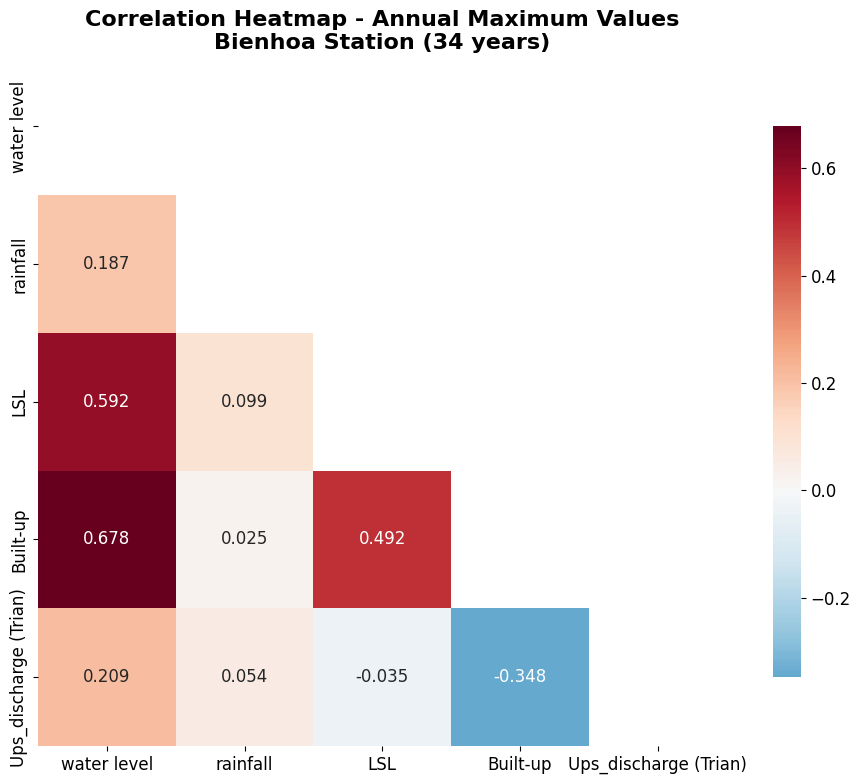

   📊 Thống kê correlation:
      • Correlation cao nhất: 1.000
      • Correlation thấp nhất: -0.348
      • Số cặp có |correlation| > 0.5: 4

🏢 Trạm: Nhabe
   ✅ Đã lưu: correlation_heatmap_Nhabe.png


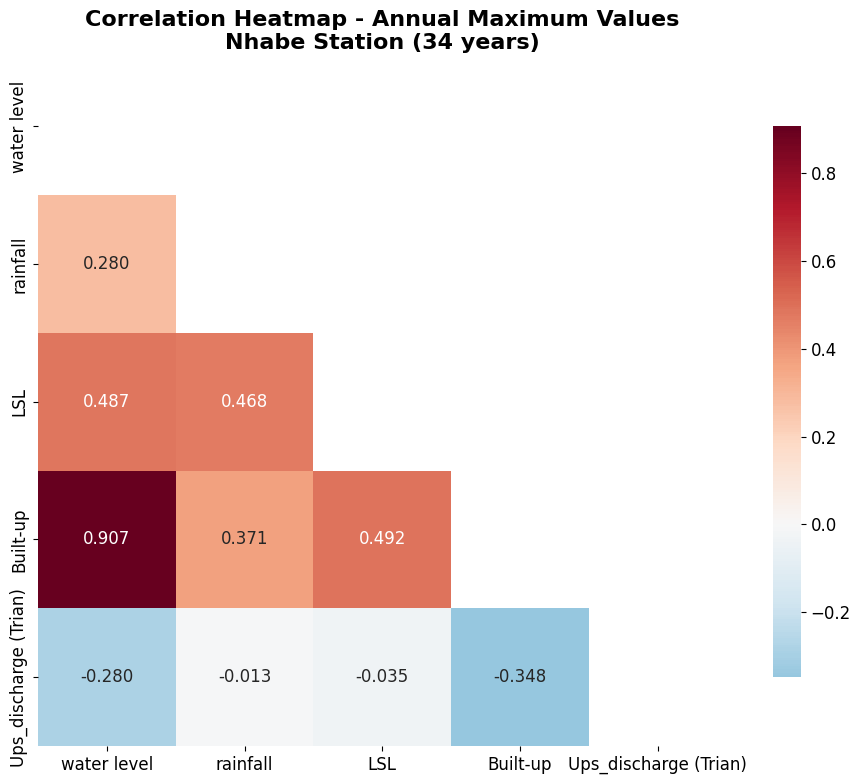

   📊 Thống kê correlation:
      • Correlation cao nhất: 1.000
      • Correlation thấp nhất: -0.348
      • Số cặp có |correlation| > 0.5: 2

🏢 Trạm: Phuan
   ✅ Đã lưu: correlation_heatmap_Phuan.png


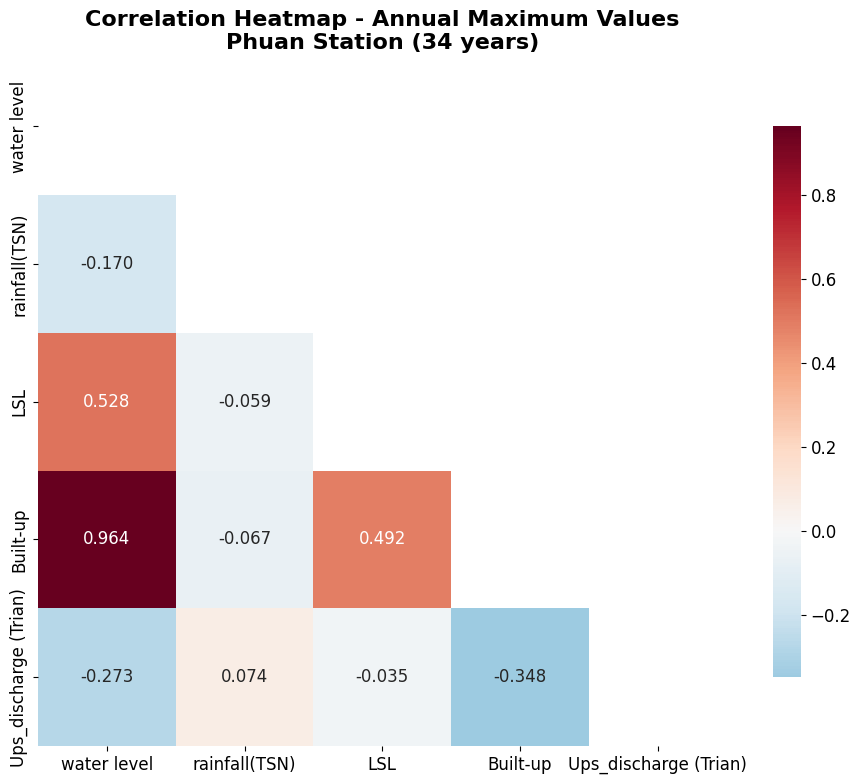

   📊 Thống kê correlation:
      • Correlation cao nhất: 1.000
      • Correlation thấp nhất: -0.348
      • Số cặp có |correlation| > 0.5: 4

🏢 Trạm: Thudaumot
   ✅ Đã lưu: correlation_heatmap_Thudaumot.png


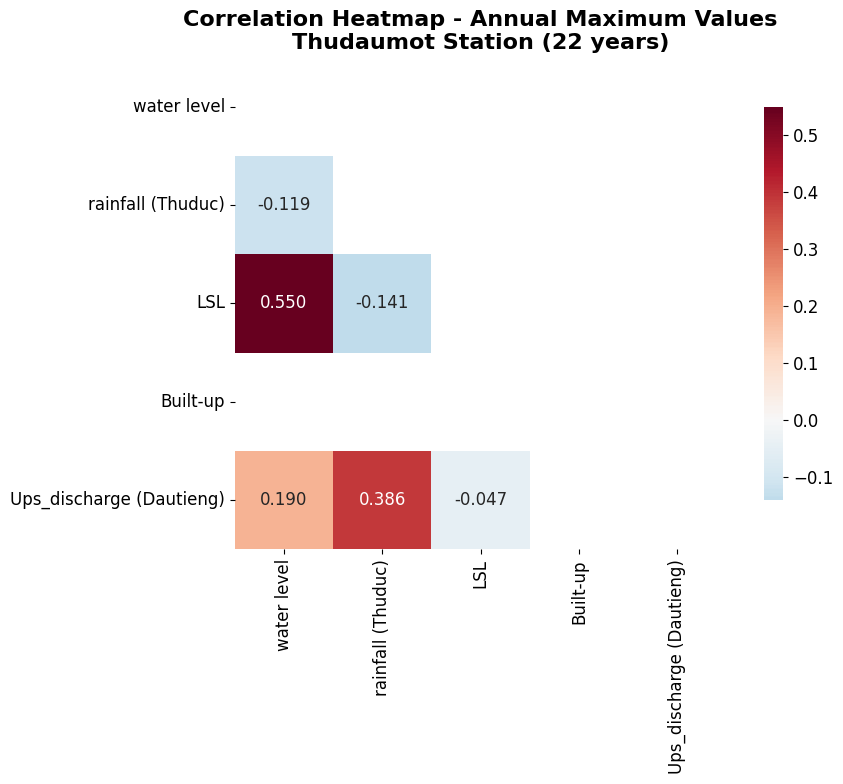

   📊 Thống kê correlation:
      • Correlation cao nhất: 1.000
      • Correlation thấp nhất: -0.141
      • Số cặp có |correlation| > 0.5: 1


In [12]:
# Tạo correlation heatmap cho từng trạm
print("📊 Tạo correlation heatmap cho annual maximum...")

for station, station_info in annual_max_data.items():
    print(f"\n🏢 Trạm: {station}")
    
    data = station_info['data']
    variables = station_info['variables']
    
    # Tính correlation matrix
    corr_matrix = data.corr()
    
    # Tạo heatmap
    plt.figure(figsize=(10, 8))
    
    # Tạo mask cho phần trên tam giác
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Vẽ heatmap
    sns.heatmap(corr_matrix, 
                mask=mask,
                annot=True, 
                cmap='RdBu_r', 
                center=0,
                square=True,
                fmt='.3f',
                cbar_kws={"shrink": .8})
    
    plt.title(f'Correlation Heatmap - Annual Maximum Values\n{station} Station ({station_info["years"]} years)', 
              fontsize=16, fontweight='bold')
    plt.tight_layout()
    
    # Lưu biểu đồ
    filename = f'correlation_heatmap_{station}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"   ✅ Đã lưu: {filename}")
    
    plt.show()
    
    # Hiển thị thống kê correlation
    print(f"   📊 Thống kê correlation:")
    print(f"      • Correlation cao nhất: {corr_matrix.max().max():.3f}")
    print(f"      • Correlation thấp nhất: {corr_matrix.min().min():.3f}")
    print(f"      • Số cặp có |correlation| > 0.5: {(abs(corr_matrix) > 0.5).sum().sum() - len(variables)}")